In [80]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.tree import DecisionTreeClassifier as dtree
from sklearn.tree import plot_tree
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier as kNN
from sklearn.metrics import plot_confusion_matrix as pltconf
from sklearn.model_selection import train_test_split as trn
from sklearn.metrics import accuracy_score as acc
from sklearn.preprocessing import LabelEncoder as LEnc
!pwd

/Users/gursi/Desktop/ML


In [81]:
headers = ['sepal_length', 'sepal_width', 'petal_length', 'petal_width', 'class']
df = pd.read_csv("./datasets/iris.data", names = headers)
df.head(10)

,sepal_length,sepal_width,petal_length,petal_width,class
0,5.1,3.5,1.4,0.2,Iris-setosa
1,4.9,3.0,1.4,0.2,Iris-setosa
2,4.7,3.2,1.3,0.2,Iris-setosa
3,4.6,3.1,1.5,0.2,Iris-setosa
4,5.0,3.6,1.4,0.2,Iris-setosa
5,5.4,3.9,1.7,0.4,Iris-setosa
6,4.6,3.4,1.4,0.3,Iris-setosa
7,5.0,3.4,1.5,0.2,Iris-setosa
8,4.4,2.9,1.4,0.2,Iris-setosa
9,4.9,3.1,1.5,0.1,Iris-setosa


In [82]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   sepal_length  150 non-null    float64
 1   sepal_width   150 non-null    float64
 2   petal_length  150 non-null    float64
 3   petal_width   150 non-null    float64
 4   class         150 non-null    object 
dtypes: float64(4), object(1)
memory usage: 6.0+ KB


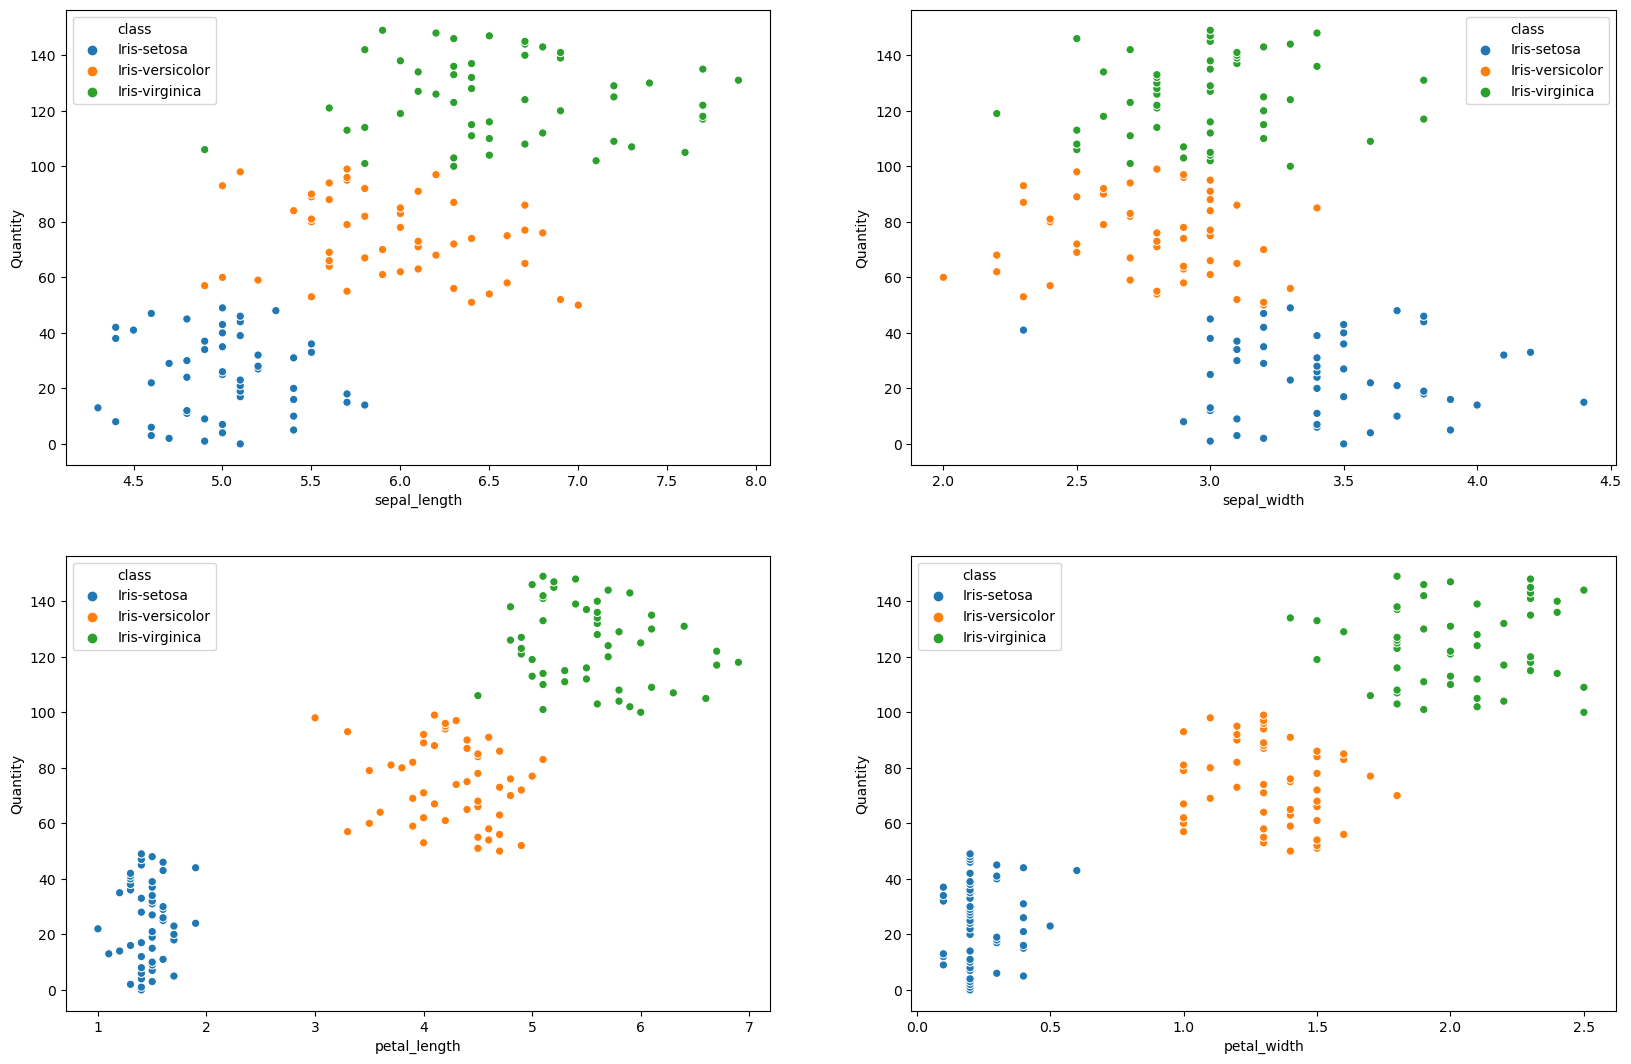

In [83]:
fig, (ax1, ax2) = plt.subplots(nrows = 2, ncols = 2, figsize = (20,13))

sns.scatterplot(x = "sepal_length", y = range(0, len(df)), hue = "class", data = df, ax = ax1[0])
sns.scatterplot(x = "sepal_width", y = range(0, len(df)), hue = "class", data = df, ax = ax1[1])
sns.scatterplot(x = "petal_length", y = range(0, len(df)), hue = "class", data = df, ax = ax2[0])
sns.scatterplot(x = "petal_width", y = range(0, len(df)), hue = "class", data = df, ax = ax2[1])

ax1[0].set_ylabel("Quantity")
ax2[0].set_ylabel("Quantity")
ax1[1].set_ylabel("Quantity")
ax2[1].set_ylabel("Quantity")
plt.show()

In [84]:
xvals = np.array(df[['sepal_length', 'sepal_width', 'petal_length', 'petal_width']], ndmin = 2)
yvals = np.array(df[['class']])
yvals = yvals.reshape(len(yvals))

In [85]:
train_x, test_x, train_y, test_y = trn(xvals, yvals, test_size = 0.2, random_state = 5)

Accuracy : 0.9333


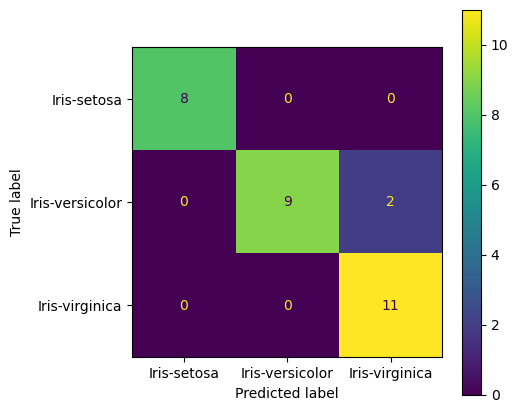

In [86]:
svm_model = SVC(kernel = 'linear')
svm_model.fit(train_x, train_y)
print("Accuracy : %.4f" %acc(test_y, svm_model.predict(test_x)))

figsvm, axsvm = plt.subplots(figsize = (5,5))
pltconf(svm_model, test_x, test_y, ax = axsvm)
plt.show()

Accuracy : 0.9000


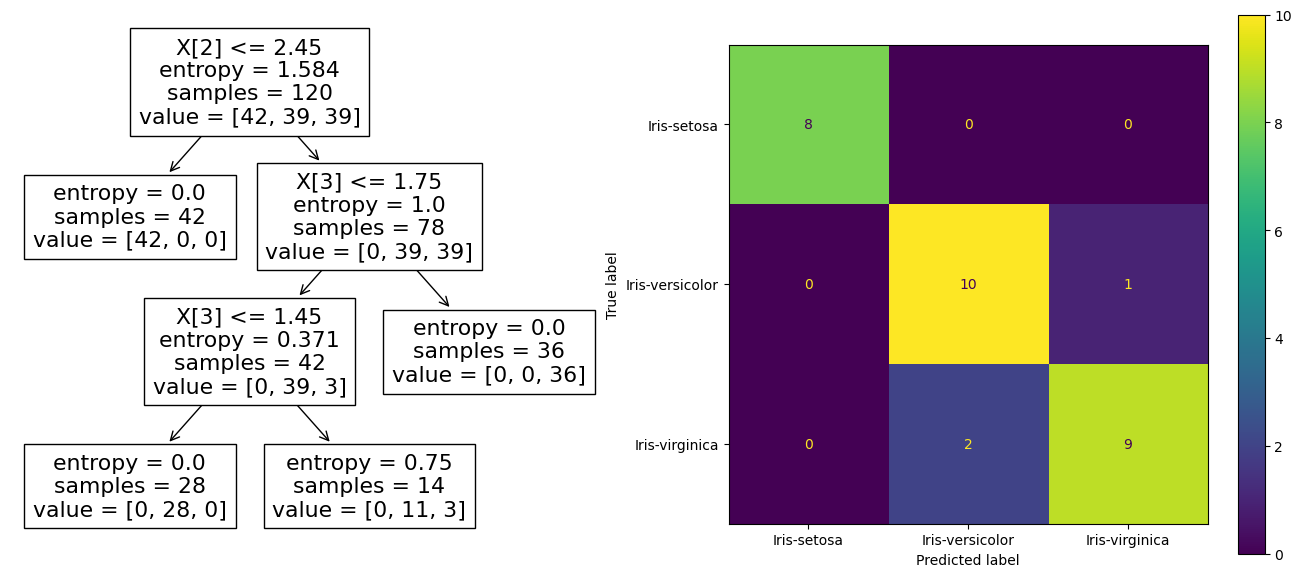

In [95]:
dtree_model = dtree(criterion = "entropy", max_depth = 3)
dtree_model.fit(train_x, train_y)
print("Accuracy : %.4f" %acc(test_y, dtree_model.predict(test_x)))

figdtree, axdtree = plt.subplots(nrows = 1, ncols = 2, figsize = (17,7))
pltconf(dtree_model, test_x, test_y, ax = axdtree[1])
plot_tree(dtree_model, ax = axdtree[0])

plt.show()

Max accuracy with neighbors :  8
Accuracy :  1.0


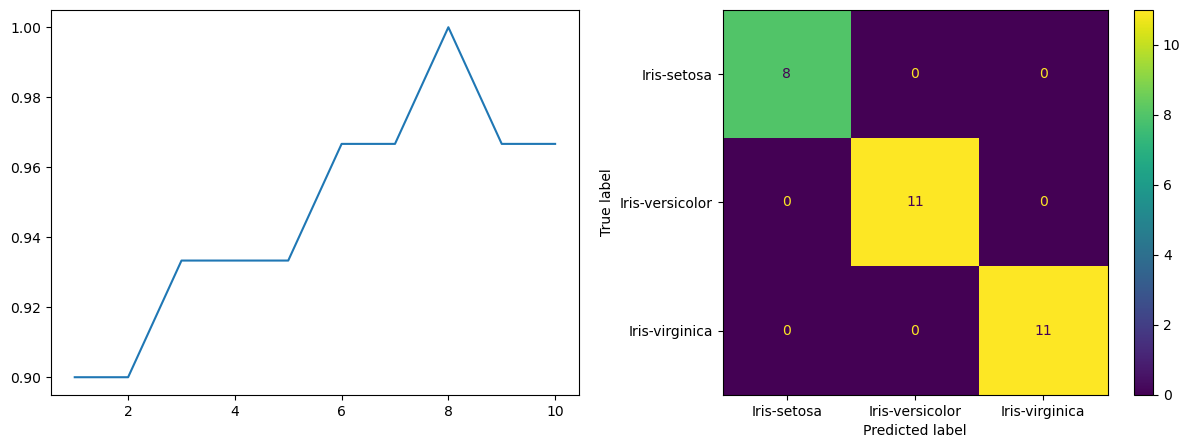

In [88]:
ks = 11
acc_arr = []

for var1 in range(1, ks):
    knn_trial = kNN(n_neighbors = var1)
    knn_trial.fit(train_x, train_y)
    score = acc(test_y, knn_trial.predict(test_x))
    acc_arr.append(score)

acc_arr = np.array(acc_arr)

ideal = acc_arr.argmax() + 1
print("Max accuracy with neighbors : ", ideal)

knn_model = kNN(n_neighbors = ideal)
knn_model.fit(train_x, train_y)
print("Accuracy : ", acc(test_y, knn_model.predict(test_x)))

figknn, axknn = plt.subplots(nrows = 1, ncols = 2, figsize = (15,5))

axknn[0].plot(range(1,ks), acc_arr)
pltconf(knn_model, test_x, test_y, ax = axknn[1])
plt.show()